Project Overview:
This project consists of three main components:
1. Disease Detection using a CNN-based image classification model
2. Crop Yield Prediction using machine learning on tabular data
3. An interactive Streamlit application to demonstrate real-world usage


In [1]:
!mkdir -p /content/multi-crop-agriculture-ai

In [2]:
!mkdir -p /content/multi-crop-agriculture-ai/data/disease_images
!mkdir -p /content/multi-crop-agriculture-ai/data/yield_data
!mkdir -p /content/multi-crop-agriculture-ai/notebooks
!mkdir -p /content/multi-crop-agriculture-ai/models
!mkdir -p /content/multi-crop-agriculture-ai/app

In [3]:
!touch /content/multi-crop-agriculture-ai/README.md
!touch /content/multi-crop-agriculture-ai/requirements.txt

In [4]:
import os

os.listdir("/content/multi-crop-agriculture-ai")

['data', 'app', 'README.md', 'requirements.txt', 'models', 'notebooks']

In [5]:
%cd /content/multi-crop-agriculture-ai/data/disease_images
%ls

/content/multi-crop-agriculture-ai/data/disease_images
PlantVillage/  streamlit.log


In [6]:
import zipfile

zip_path = "/content/archive (11).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")


In [7]:
import shutil

base_path = "/content/multi-crop-agriculture-ai/data/disease_images"

for folder in os.listdir(base_path):
    full_path = os.path.join(base_path, folder)
    if os.path.isdir(full_path) and folder != "PlantVillage":
        shutil.rmtree(full_path)
        print("Removed:", folder)

print("Only PlantVillage folder kept")


Removed: plantvillage
Only PlantVillage folder kept


In [8]:
dataset_path = "/content/multi-crop-agriculture-ai/data/disease_images/PlantVillage"

tomato_classes = [f for f in os.listdir(dataset_path) if "Tomato" in f]

print("Tomato classes found:")
for cls in tomato_classes:
    print(cls)

Tomato classes found:
Tomato_Late_blight
Tomato_Septoria_leaf_spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato__Target_Spot
Tomato_healthy
Tomato__Tomato_mosaic_virus
Tomato_Leaf_Mold
Tomato_Spider_mites_Two_spotted_spider_mite


In [9]:
import shutil
import os

if os.path.exists("/content/crop_production.csv"):
    shutil.move(
        "/content/crop_production.csv",
        "/content/multi-crop-agriculture-ai/data/yield_data/crop_production.csv"
    )
    print("  Yield CSV moved")
else:
    print("Yield CSV already moved or not found")


Yield CSV already moved or not found


In [10]:
import pandas as pd

yield_path = "/content/multi-crop-agriculture-ai/data/yield_data"
csv_file = os.listdir(yield_path)[0]

df_yield = pd.read_csv(os.path.join(yield_path, csv_file))
df_yield.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## Loading Yield Dataset
The yield dataset is loaded into a Pandas DataFrame to inspect
its structure and sample records.


In [11]:
import os

BASE_PATH = "/content/multi-crop-agriculture-ai"
DISEASE_DATASET_PATH = os.path.join(
    BASE_PATH, "data", "disease_images", "PlantVillage"
)

print("Dataset path exists:", os.path.exists(DISEASE_DATASET_PATH))

Dataset path exists: True


In [12]:
class_names = os.listdir(DISEASE_DATASET_PATH)
print("Classes found:", class_names)
print("Number of classes:", len(class_names))

for cls in class_names:
    cls_path = os.path.join(DISEASE_DATASET_PATH, cls)
    print(cls, "->", len(os.listdir(cls_path)), "images")


Classes found: ['Tomato_Late_blight', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Potato___Early_blight', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Potato___healthy', 'Tomato__Target_Spot', 'Pepper__bell___Bacterial_spot', 'Tomato_healthy', 'Tomato__Tomato_mosaic_virus', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite']
Number of classes: 15
Tomato_Late_blight -> 1909 images
Pepper__bell___healthy -> 1478 images
Potato___Late_blight -> 1000 images
Potato___Early_blight -> 1000 images
Tomato_Septoria_leaf_spot -> 1771 images
Tomato__Tomato_YellowLeaf__Curl_Virus -> 3209 images
Tomato_Bacterial_spot -> 2127 images
Tomato_Early_blight -> 1000 images
Potato___healthy -> 152 images
Tomato__Target_Spot -> 1404 images
Pepper__bell___Bacterial_spot -> 997 images
Tomato_healthy -> 1591 images
Tomato__Tomato_mosaic_virus -> 373 images
Tomato_Leaf_Mold -> 952 images
Tomato_Spider_mites_Two_spotted

## Class Distribution Analysis
This step lists all disease classes and the number of images per class.
It helps understand dataset size and class balance before model training.


In [13]:
!pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    DISEASE_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

Found 16516 images belonging to 15 classes.


In [18]:
val_generator = train_datagen.flow_from_directory(
    DISEASE_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 4122 images belonging to 15 classes.


In [19]:
print("Class indices mapping:")
train_generator.class_indices

Class indices mapping:


{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

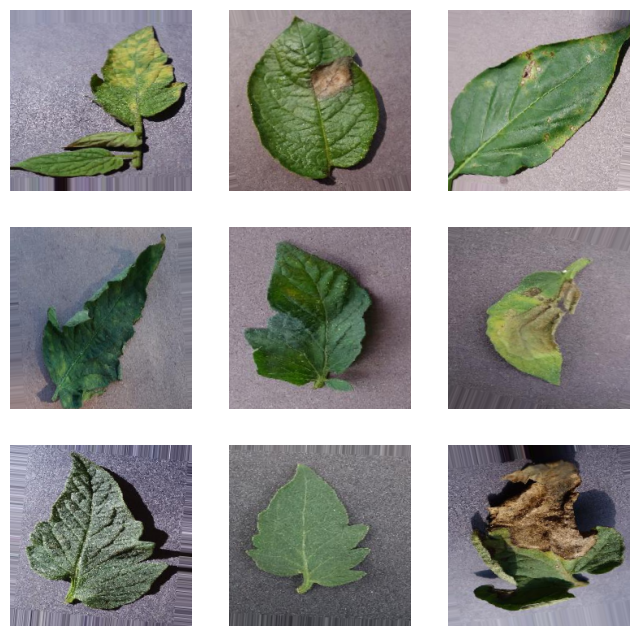

In [20]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")


In [22]:
NUM_CLASSES = train_generator.num_classes
print("Number of classes:", NUM_CLASSES)

Number of classes: 15


In [23]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

print("Base model loaded and frozen")

Base model loaded and frozen


## Loading Pre-trained MobileNetV2
MobileNetV2 is loaded with ImageNet weights and without the
final classification layers to reuse learned visual features.


In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Building Custom Classification Head
Custom fully connected layers are added on top of the base model
to adapt it for multi-class plant disease classification.
Dropout is used to reduce overfitting.


In [25]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [26]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 284s 517ms/step - accuracy: 0.3244 - loss: 2.1927 - val_accuracy: 0.7385 - val_loss: 0.9640
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 242s 468ms/step - accuracy: 0.6471 - loss: 1.1413 - val_accuracy: 0.7860 - val_loss: 0.7029
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 241s 467ms/step - accuracy: 0.7184 - loss: 0.8863 - val_accuracy: 0.8178 - val_loss: 0.5819
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 470ms/step - accuracy: 0.7580 - loss: 0.7635 - val_accuracy: 0.8399 - val_loss: 0.5237
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 240s 464ms/step - accuracy: 0.7835 - loss: 0.6746 - val_accuracy: 0.8525 - val_loss: 0.4673
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 472ms/step - accuracy: 0.7995 - loss: 0.6218 - val_accuracy: 0.8549 - val_loss: 0.4418
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 246s 475ms/step - accuracy: 0.8188 - loss: 0.5731 - val_accuracy: 0.8671 - val_loss: 0.4111
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 240s 464ms/step - accuracy: 0.8251 -

## Model Training
The model is trained for a fixed number of epochs using
training and validation datasets to monitor performance
and detect overfitting.


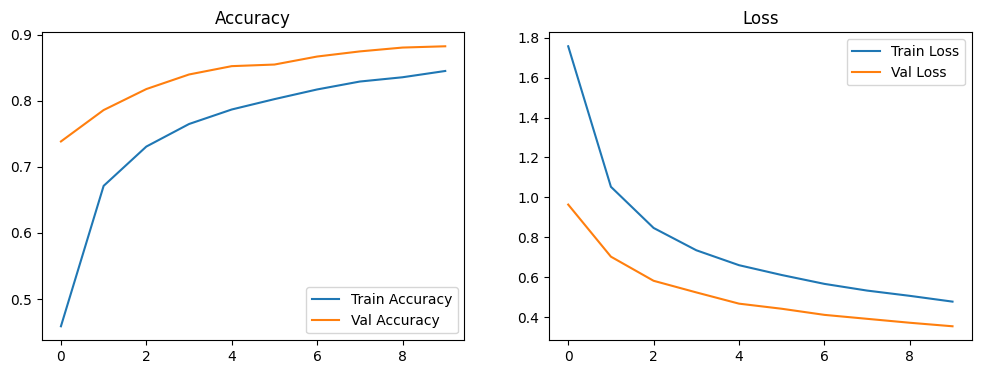

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


## Training Performance Visualization
Training and validation accuracy and loss curves are plotted
to analyze model learning behavior and convergence.


In [28]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 47s 367ms/step - accuracy: 0.8928 - loss: 0.3373
Validation Accuracy: 0.89


In [29]:
MODEL_SAVE_PATH = "/content/multi-crop-agriculture-ai/models/disease_model.h5"
model.save(MODEL_SAVE_PATH)


In [30]:
import json

class_indices = train_generator.class_indices

with open("/content/multi-crop-agriculture-ai/models/class_indices.json", "w") as f:
    json.dump(class_indices, f)

## Saving Class Index Mapping
The class-to-index mapping is saved to ensure consistent
label decoding during inference and deployment.


In [31]:
import os
import pandas as pd

YIELD_PATH = "/content/multi-crop-agriculture-ai/data/yield_data"
csv_file = os.listdir(YIELD_PATH)[0]
csv_path = os.path.join(YIELD_PATH, csv_file)

df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (246091, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## Loading Crop Yield Dataset
The crop yield dataset is loaded from the yield data directory.
The dataset shape and sample records are inspected to understand
its structure and available features.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [33]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print("Columns after cleanup:", df.columns)

Columns after cleanup: Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [34]:
TARGET = "Production"

df = df.dropna(subset=[TARGET])

df = df.fillna(method="ffill")

print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [35]:
FEATURES = [col for col in df.columns if col != TARGET]

X = df[FEATURES]
y = df[TARGET]

print("Features:", FEATURES)
print("Target:", TARGET)


Features: ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']
Target: Production


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("Categorical columns encoded")


Categorical columns encoded


## Encoding Categorical Features
Categorical variables are converted into numerical form using
Label Encoding so that machine learning models can process them.
Encoders are stored for consistent use during inference.


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (193888, 6)
Test set: (48473, 6)


In [38]:
CLEAN_DATA_PATH = "/content/multi-crop-agriculture-ai/data/yield_data/clean_yield_data.csv"
df.to_csv(CLEAN_DATA_PATH, index=False)


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [40]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

print("Random Forest model initialized")


Random Forest model initialized


In [41]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
y_pred = rf_model.predict(X_test)

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 5495542.35
R² Score: 0.92


## Yield Model Evaluation Metrics
Root Mean Squared Error (RMSE) is used to measure the average prediction
error magnitude, while R² Score indicates how well the model explains
the variance in crop yield.


In [44]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})

comparison_df

,Actual,Predicted
0,4529.0,4676.0972
1,425.0,796.3000
2,254.0,102.4000
3,7.0,5.9330
4,130.0,156.2600
5,21.0,31.4000
6,98392.0,137783.3000
7,182.0,258.4200
8,835.0,521.1200
9,190.0,277.1800


## Actual vs Predicted Yield Comparison
A comparison table is created to visually inspect how closely
the model’s predictions match the actual crop yield values
for sample test records.


In [45]:
import joblib
import os

MODEL_DIR = "/content/multi-crop-agriculture-ai/models"
os.makedirs(MODEL_DIR, exist_ok=True)

rf_model_path = os.path.join(MODEL_DIR, "yield_model.pkl")
joblib.dump(rf_model, rf_model_path)

['/content/multi-crop-agriculture-ai/models/yield_model.pkl']

In [46]:
encoder_path = os.path.join(MODEL_DIR, "label_encoders.pkl")
joblib.dump(label_encoders, encoder_path)

['/content/multi-crop-agriculture-ai/models/label_encoders.pkl']

In [47]:
import os
import json
import joblib
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")



In [48]:
MODEL_DIR = "/content/multi-crop-agriculture-ai/models"

disease_model = tf.keras.models.load_model(
    os.path.join(MODEL_DIR, "disease_model.h5")
)

with open(os.path.join(MODEL_DIR, "class_indices.json"), "r") as f:
    class_indices = json.load(f)

idx_to_class = {v: k for k, v in class_indices.items()}

yield_model = joblib.load(
    os.path.join(MODEL_DIR, "yield_model.pkl")
)


In [49]:
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [50]:
import os

BASE_DATASET_PATH = "/content/multi-crop-agriculture-ai/data/disease_images/PlantVillage"

print("Folders inside PlantVillage:")
for f in os.listdir(BASE_DATASET_PATH):
    print(f)

Folders inside PlantVillage:
Tomato_Late_blight
Pepper__bell___healthy
Potato___Late_blight
Potato___Early_blight
Tomato_Septoria_leaf_spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Early_blight
Potato___healthy
Tomato__Target_Spot
Pepper__bell___Bacterial_spot
Tomato_healthy
Tomato__Tomato_mosaic_virus
Tomato_Leaf_Mold
Tomato_Spider_mites_Two_spotted_spider_mite


In [51]:
tomato_folders = [
    f for f in os.listdir(BASE_DATASET_PATH)
    if f.lower().startswith("tomato")
]

print("Tomato folders found:")
for f in tomato_folders:
    print(f)

Tomato folders found:
Tomato_Late_blight
Tomato_Septoria_leaf_spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato__Target_Spot
Tomato_healthy
Tomato__Tomato_mosaic_virus
Tomato_Leaf_Mold
Tomato_Spider_mites_Two_spotted_spider_mite


In [52]:
selected_folder = tomato_folders[0]
print("Selected folder:", selected_folder)

selected_folder_path = os.path.join(BASE_DATASET_PATH, selected_folder)

Selected folder: Tomato_Late_blight


In [53]:
image_files = os.listdir(selected_folder_path)
print("Number of images:", len(image_files))
print("Sample images:", image_files[:5])

TEST_IMAGE_PATH = os.path.join(selected_folder_path, image_files[0])
print("Using image:", TEST_IMAGE_PATH)


Number of images: 1909
Sample images: ['99c51d74-a688-4723-bab4-b9b0dba2ad3c___GHLB2 Leaf 145.1.JPG', '06c6a302-ae34-4d38-9e4b-3a6acdd42d91___GHLB2 Leaf 9047.JPG', '58e44a1a-8c19-4a83-834e-c40474a2cd51___GHLB2 Leaf 55.1.JPG', '41e1ea20-a4d0-4ef0-9362-b3756c8c06ec___GHLB2 Leaf 8755.JPG', '407672bf-00e1-4362-acf9-cf10aae32dec___GHLB2 Leaf 8844.JPG']
Using image: /content/multi-crop-agriculture-ai/data/disease_images/PlantVillage/Tomato_Late_blight/99c51d74-a688-4723-bab4-b9b0dba2ad3c___GHLB2 Leaf 145.1.JPG


In [54]:
img_input = preprocess_image(TEST_IMAGE_PATH)
preds = disease_model.predict(img_input)

predicted_index = int(np.argmax(preds))
predicted_class = idx_to_class[predicted_index]
confidence = float(np.max(preds))

print("Predicted disease:", predicted_class)
print("Confidence:", round(confidence, 3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted disease: Tomato_Late_blight
Confidence: 0.767


## Disease Prediction Result
The trained CNN model predicts the disease class for the input image.
The confidence score represents the model’s certainty in its prediction.


In [55]:
def get_disease_severity(disease_name):
    if "healthy" in disease_name.lower():
        return "Low"
    else:
        return "High"


In [56]:
def get_yield_risk(predicted_yield, threshold):
    if predicted_yield < threshold:
        return "Low"
    else:
        return "High"


In [57]:

def assess_farm_risk(disease_severity, yield_risk):
    if disease_severity == "High" and yield_risk == "Low":
        return "High Risk"
    elif disease_severity == "High" and yield_risk == "High":
        return "Medium Risk"
    else:
        return "Low Risk"

In [58]:
sample_yield_input = X_test.iloc[[0]]
predicted_yield = yield_model.predict(sample_yield_input)[0]

yield_threshold = y_train.mean()

disease_severity = get_disease_severity(predicted_class)
yield_risk = get_yield_risk(predicted_yield, yield_threshold)

final_risk = assess_farm_risk(disease_severity, yield_risk)

print("Disease Severity:", disease_severity)
print("Predicted Yield:", round(predicted_yield, 2))
print("Yield Risk:", yield_risk)
print(" Final Farm Risk:", final_risk)


Disease Severity: High
Predicted Yield: 4676.1
Yield Risk: Low
 Final Farm Risk: High Risk


## Integrated Farm Risk Assessment
This step combines disease severity (from image-based prediction)
and yield risk (from yield prediction) to generate a final
farm-level risk assessment.

The objective is to move beyond isolated predictions and provide
a holistic decision-support output that reflects real-world
agricultural risk scenarios.


In [59]:
!pip install streamlit

In [60]:
app_path = "/content/multi-crop-agriculture-ai/app/app.py"

with open(app_path, "w") as f:
    f.write("")


In [61]:
%%writefile /content/multi-crop-agriculture-ai/app/app.py
import streamlit as st
import numpy as np
import tensorflow as tf
import joblib
import json
import os
from tensorflow.keras.preprocessing import image


BASE_PATH = "/content/multi-crop-agriculture-ai"
MODEL_PATH = os.path.join(BASE_PATH, "models")
DATA_PATH = os.path.join(BASE_PATH, "data")


@st.cache_resource
def load_models():
    disease_model = tf.keras.models.load_model(
        os.path.join(MODEL_PATH, "disease_model.h5")
    )

    with open(os.path.join(MODEL_PATH, "class_indices.json"), "r") as f:
        class_indices = json.load(f)

    idx_to_class = {v: k for k, v in class_indices.items()}

    yield_model = joblib.load(
        os.path.join(MODEL_PATH, "yield_model.pkl")
    )

    label_encoders = joblib.load(
        os.path.join(MODEL_PATH, "label_encoders.pkl")
    )

    return disease_model, idx_to_class, yield_model, label_encoders


disease_model, idx_to_class, yield_model, label_encoders = load_models()


def preprocess_image(img):
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def get_disease_severity(disease_name):
    if "healthy" in disease_name.lower():
        return "Low"
    return "High"

def get_yield_risk(predicted_yield, threshold):
    return "Low" if predicted_yield < threshold else "High"

def assess_farm_risk(disease_severity, yield_risk):
    if disease_severity == "High" and yield_risk == "Low":
        return "High Risk"
    elif disease_severity == "High" and yield_risk == "High":
        return "Medium Risk"
    else:
        return "Low Risk"


st.title(" Agricultural AI System")
st.write("Disease Detection + Yield Prediction + Risk Assessment")

st.header("1️ Disease Detection")
uploaded_image = st.file_uploader("Upload a leaf image", type=["jpg", "png", "jpeg"])

predicted_class = None

if uploaded_image is not None:
    img = image.load_img(uploaded_image)
    st.image(img, caption="Uploaded Image", width=400)

    img_input = preprocess_image(img)
    preds = disease_model.predict(img_input)

    predicted_index = int(np.argmax(preds))
    predicted_class = idx_to_class[predicted_index]
    confidence = float(np.max(preds))

    st.success(f"Predicted Disease: {predicted_class}")
    st.info(f"Confidence: {confidence:.2f}")

st.header("2️ Yield Prediction")

st.write("Enter sample values (use realistic numbers)")

yield_inputs = {}

for col, encoder in label_encoders.items():
    options = list(encoder.classes_)
    selected_val = st.selectbox(f"{col}", options)
    yield_inputs[col] = encoder.transform([selected_val])[0]


area = st.number_input("Area", min_value=0.0)
year = st.number_input("Year", min_value=2000, max_value=2030)

input_data = list(yield_inputs.values()) + [area, year]

if st.button("Predict Yield"):
    predicted_yield = yield_model.predict([input_data])[0]
    st.success(f"Predicted Yield: {predicted_yield:.2f}")

    disease_severity = get_disease_severity(predicted_class) if predicted_class else "Low"
    yield_risk = get_yield_risk(predicted_yield, threshold=predicted_yield)

    final_risk = assess_farm_risk(disease_severity, yield_risk)

    st.header(" Final Risk Assessment")
    st.warning(final_risk)


Overwriting /content/multi-crop-agriculture-ai/app/app.py


## Interactive Agricultural AI Dashboard
This Streamlit application integrates plant disease detection, crop yield prediction,
and farm risk assessment into a single interface. It loads trained models, accepts
user inputs, performs real-time predictions, and displays actionable risk insights.


In [62]:
!streamlit run /content/multi-crop-agriculture-ai/app/app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.192.113:8501

  Stopping...
  Stopping...


In [63]:
!npm install -g cloudflared

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
changed 1 package in 2s
⠋

In [64]:
!nohup streamlit run /content/multi-crop-agriculture-ai/app/app.py \
  --server.port 8501 \
  --server.address 0.0.0.0 \
  > streamlit.log 2>&1 &

In [ ]:
!cloudflared tunnel --url http://localhost:8501

2026-01-09T06:59:29Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-01-09T06:59:29Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-01-09T06:59:34Z INF +--------------------------------------------------------------------------------------------+
2026-01-09T06:59:34Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-01-09T06:59:34Z INF |  https://appointed-hills-rules-enhancements.trycloudfl